# 波士顿房价预测（numpy）

Epoch 1, Loss: 17.43535439013805
Epoch 2, Loss: 16.55068061963496
Epoch 3, Loss: 15.716847031429161
Epoch 4, Loss: 14.93069547248317
Epoch 5, Loss: 14.189276024620638
Epoch 6, Loss: 13.489832687384608
Epoch 7, Loss: 12.829790073258048
Epoch 8, Loss: 12.206741042315443
Epoch 9, Loss: 11.618435208695843
Epoch 10, Loss: 11.062768256217163
Epoch 11, Loss: 10.537772005018388
Epoch 12, Loss: 10.04160517534702
Epoch 13, Loss: 9.572544798529119
Epoch 14, Loss: 9.128978228790903
Epoch 15, Loss: 8.70939571296622
Epoch 16, Loss: 8.312383478242277
Epoch 17, Loss: 7.936617300985697
Epoch 18, Loss: 7.580856522368597
Epoch 19, Loss: 7.243938478996154
Epoch 20, Loss: 6.924773319036989
Epoch 21, Loss: 6.622339176489559
Epoch 22, Loss: 6.335677678193585
Epoch 23, Loss: 6.063889760027107
Epoch 24, Loss: 5.806131770427667
Epoch 25, Loss: 5.561611840950095
Epoch 26, Loss: 5.329586505032583
Epoch 27, Loss: 5.109357547495728
Epoch 28, Loss: 4.900269068553668
Epoch 29, Loss: 4.701704747279646
Epoch 30, Loss: 

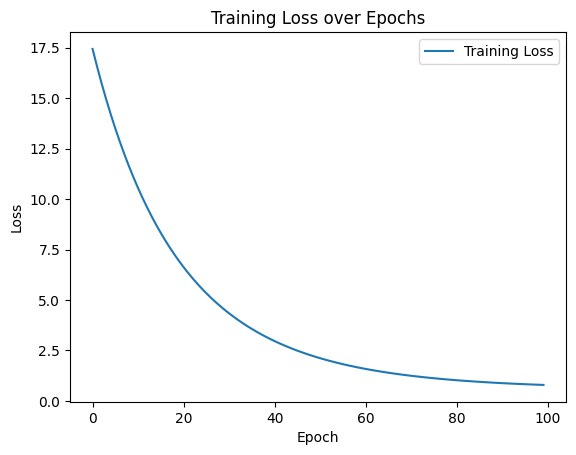

Test Loss with L2 Regularization: 0.9156552894770822


In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing # Boston数据集已过期，使用California Housing Set替代
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
# 获取California住房数据集 
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化模型参数
weights = np.random.randn(X_train.shape[1])
bias = np.random.randn()

# 定义模型
def model(X, weights, bias):
    return np.dot(X, weights) + bias



# 损失函数，均方损失，增加L2正则化
def mse_loss(y_true, y_pred, weights, lambda_l2):
    mse = np.mean((y_true - y_pred) ** 2)
    l2_penalty = lambda_l2 * np.sum(weights ** 2)
    return mse + l2_penalty

# 训练函数，增加损失记录和L2正则化
def train(X, y, weights, bias, learning_rate, epochs, lambda_l2):
    losses = []  # 用于记录每个epoch的损失
    for epoch in range(epochs):
        predictions = model(X, weights, bias)
        loss = mse_loss(y, predictions, weights, lambda_l2)
        losses.append(loss)  # 记录损失
        weights_gradient = -2 * np.dot(X.T, (y - predictions)) / len(y) + 2 * lambda_l2 * weights
        bias_gradient = -2 * np.mean(y - predictions)
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient
        print(f"Epoch {epoch+1}, Loss: {loss}")
    return weights, bias, losses

# 超参数设置
lr = 0.01
epochs = 100
lambda_l2 = 0.01 # L2正则化项

# 训练模型并记录损失
weights, bias, losses = train(X_train, y_train, weights, bias, lr, epochs, lambda_l2)

# 绘制损失曲线
plt.plot(losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 评估模型在测试集上的性能
predictions_test = model(X_test, weights, bias)
test_loss = mse_loss(y_test, predictions_test, weights, lambda_l2)
print(f"Test Loss with L2 Regularization: {test_loss}")

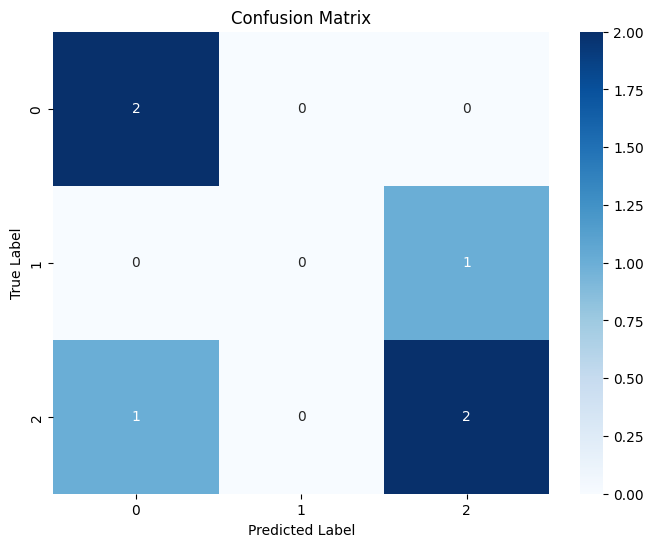

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 假设y_true是真实标签，y_pred是模型预测的标签
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()